In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('../input/spam-or-nonspam/SMS_train.csv', encoding='unicode_escape', names=['message', 'label'])
test_data = pd.read_csv('../input/spam-or-nonspam/SMS_test.csv', encoding='unicode_escape', names=['message', 'label'])

In [4]:
train_data.head()

,message,label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam


In [5]:
test_data.head()

,message,label
0,"UpgrdCentre Orange customer, you may now claim...",Spam
1,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,Congrats! Nokia 3650 video camera phone is you...,Spam
3,URGENT! Your Mobile number has been awarded wi...,Spam
4,Someone has contacted our dating service and e...,Spam


In [6]:
train_data.info

<bound method DataFrame.info of                                                message     label
0                           Rofl. Its true to its name  Non-Spam
1    The guy did some bitching but I acted like i'd...  Non-Spam
2    Pity, * was in mood for that. So...any other s...  Non-Spam
3                 Will ü b going to esplanade fr home?  Non-Spam
4    This is the 2nd time we have tried 2 contact u...      Spam
..                                                 ...       ...
952  hows my favourite person today? r u workin har...  Non-Spam
953                      How much you got for cleaning  Non-Spam
954  Sorry da. I gone mad so many pending works wha...  Non-Spam
955                                 Wat time ü finish?  Non-Spam
956                    Just glad to be talking to you.  Non-Spam

[957 rows x 2 columns]>

In [7]:
test_data.info

<bound method DataFrame.info of                                                message     label
0    UpgrdCentre Orange customer, you may now claim...      Spam
1    Loan for any purpose £500 - £75,000. Homeowner...      Spam
2    Congrats! Nokia 3650 video camera phone is you...      Spam
3    URGENT! Your Mobile number has been awarded wi...      Spam
4    Someone has contacted our dating service and e...      Spam
..                                                 ...       ...
120  7 wonders in My WORLD 7th You 6th Ur style 5th...  Non-Spam
121  Try to do something dear. You read something f...  Non-Spam
122  Sun ah... Thk mayb can if dun have anythin on....  Non-Spam
123  SYMPTOMS when U are in love: "1.U like listeni...  Non-Spam
124  Great. Have a safe trip. Dont panic surrender ...  Non-Spam

[125 rows x 2 columns]>

In [8]:
train_data.shape

(957, 2)

In [9]:
test_data.shape

(125, 2)

In [10]:
train_data.columns

Index(['message', 'label'], dtype='object')

In [11]:
test_data.columns

Index(['message', 'label'], dtype='object')

In [12]:
for i in train_data['label'].unique():
    print(i)

Non-Spam
Spam


In [13]:
for i in test_data['label'].unique():
  print(i)

Spam
Non-Spam


In [14]:
for i in train_data.loc[train_data['label'] == 'Non-Spam'].shape:
    print(i)

835
2


In [15]:
for i in test_data.loc[test_data['label'] == 'Spam'].shape:
  print(i)

76
2


In [16]:
train_data.isnull().sum()

message    0
label      0
dtype: int64

In [17]:
test_data.isnull().sum()

message    0
label      0
dtype: int64

In [18]:
train_data.dtypes

message    object
label      object
dtype: object

In [19]:
test_data.dtypes

message    object
label      object
dtype: object

<AxesSubplot:xlabel='label', ylabel='count'>

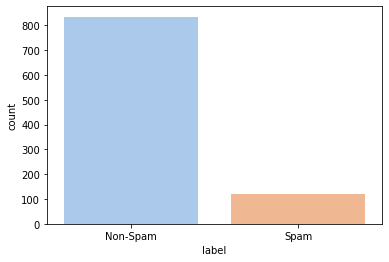

In [20]:
sns.countplot(train_data['label'], palette='pastel')

<AxesSubplot:xlabel='label', ylabel='count'>

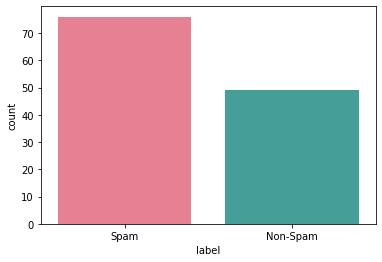

In [21]:
sns.countplot(test_data['label'], palette='husl')

In [22]:
import string
from nltk.corpus import stopwords

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [24]:
def text_process(msg):
    nopunc = [char for char in msg if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [25]:
train_data['message'].head().apply(text_process)

0                                   [rofl, true, name]
1    [guy, bitching, acted, like, id, interested, b...
2                     [pity, mood, soany, suggestions]
3                   [ü, b, going, esplanade, fr, home]
4    [2nd, time, tried, 2, contact, u, u, £750, pou...
Name: message, dtype: object

In [26]:
train_data['message']=train_data['message'].apply(text_process)

In [27]:
train_data.head(10)

,message,label
0,"[rofl, true, name]",Non-Spam
1,"[guy, bitching, acted, like, id, interested, b...",Non-Spam
2,"[pity, mood, soany, suggestions]",Non-Spam
3,"[ü, b, going, esplanade, fr, home]",Non-Spam
4,"[2nd, time, tried, 2, contact, u, u, £750, pou...",Spam
5,"[reminder, o2, get, 250, pounds, free, call, c...",Spam
6,"[huh, lei]",Non-Spam
7,"[dont, wait, til, least, wednesday, see, get]",Non-Spam
8,"[ard, 6, like, dat, lor]",Non-Spam
9,"[ok, lor, sony, ericsson, salesman, ask, shuhu...",Non-Spam


In [28]:
from nltk.stem import WordNetLemmatizer

In [29]:
wnl = WordNetLemmatizer()

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [31]:
def process2(message):
  reslist = []
  for i in message:
    lower = i.lower()
    reslist.append(wnl.lemmatize(lower))
  return reslist


In [32]:
train_data['message'] = train_data['message'].apply(process2)

In [33]:
test_data.head()

,message,label
0,"UpgrdCentre Orange customer, you may now claim...",Spam
1,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,Congrats! Nokia 3650 video camera phone is you...,Spam
3,URGENT! Your Mobile number has been awarded wi...,Spam
4,Someone has contacted our dating service and e...,Spam


In [34]:
test_data['message']=test_data['message'].apply(text_process)

In [35]:
test_data.head()

,message,label
0,"[upgrdcentre, orange, customer, may, claim, fr...",Spam
1,"[loan, purpose, £500, £75000, homeowners, tena...",Spam
2,"[congrats, nokia, 3650, video, camera, phone, ...",Spam
3,"[urgent, mobile, number, awarded, £2000, prize...",Spam
4,"[someone, contacted, dating, service, entered,...",Spam


In [36]:
test_data['message'] = test_data['message'].apply(process2)

In [37]:
test_data.head()

,message,label
0,"[upgrdcentre, orange, customer, may, claim, fr...",Spam
1,"[loan, purpose, £500, £75000, homeowner, tenan...",Spam
2,"[congrats, nokia, 3650, video, camera, phone, ...",Spam
3,"[urgent, mobile, number, awarded, £2000, prize...",Spam
4,"[someone, contacted, dating, service, entered,...",Spam


In [38]:
train = train_data.loc[:957]

In [39]:
test = test_data.loc[:125]

In [40]:
train

,message,label
0,"[rofl, true, name]",Non-Spam
1,"[guy, bitching, acted, like, id, interested, b...",Non-Spam
2,"[pity, mood, soany, suggestion]",Non-Spam
3,"[ü, b, going, esplanade, fr, home]",Non-Spam
4,"[2nd, time, tried, 2, contact, u, u, £750, pou...",Spam
...,...,...
952,"[hows, favourite, person, today, r, u, workin,...",Non-Spam
953,"[much, got, cleaning]",Non-Spam
954,"[sorry, da, gone, mad, many, pending, work]",Non-Spam
955,"[wat, time, ü, finish]",Non-Spam


In [41]:
test

,message,label
0,"[upgrdcentre, orange, customer, may, claim, fr...",Spam
1,"[loan, purpose, £500, £75000, homeowner, tenan...",Spam
2,"[congrats, nokia, 3650, video, camera, phone, ...",Spam
3,"[urgent, mobile, number, awarded, £2000, prize...",Spam
4,"[someone, contacted, dating, service, entered,...",Spam
...,...,...
120,"[7, wonder, world, 7th, 6th, ur, style, 5th, u...",Non-Spam
121,"[try, something, dear, read, something, exam]",Non-Spam
122,"[sun, ah, thk, mayb, dun, anythin, thk, book, ...",Non-Spam
123,"[symptom, u, love, 1u, like, listening, song, ...",Non-Spam


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
def reconstruct(x):
  resstr = ' '.join(x)
  return resstr

In [44]:
train['message'] = train['message'].apply(reconstruct)

In [45]:
train.head()

,message,label
0,rofl true name,Non-Spam
1,guy bitching acted like id interested buying s...,Non-Spam
2,pity mood soany suggestion,Non-Spam
3,ü b going esplanade fr home,Non-Spam
4,2nd time tried 2 contact u u £750 pound prize ...,Spam


In [46]:
tf = TfidfVectorizer(lowercase=False)

In [47]:
tf.fit(train['message'])

TfidfVectorizer(lowercase=False)

In [48]:
data = tf.transform(train['message']).toarray()

In [49]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
ds = RandomForestClassifier()

In [52]:
ds.fit(data,train['label'])

RandomForestClassifier()

In [53]:
test['message'] = test['message'].apply(reconstruct)

In [54]:
test.shape

(125, 2)

In [55]:
test_input = tf.transform(test['message']).toarray()

In [56]:
test.shape

(125, 2)

In [57]:
pred_out = ds.predict(test_input)

In [58]:
pred_out

array(['Spam', 'Non-Spam', 'Spam', 'Spam', 'Non-Spam', 'Non-Spam', 'Spam',
       'Non-Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Non-Spam', 'Spam',
       'Spam', 'Spam', 'Non-Spam', 'Non-Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Non-Spam', 'Spam', 'Non-Spam', 'Non-Spam', 'Spam',
       'Non-Spam', 'Spam', 'Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Spam', 'Non-Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam', 'Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Non-Spam', 'Spam', 'Spam', 'Non-Spam',
       'Non-Spam', 'Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam',
       'Spam', 'Spam', 'Spam', 'Non-Spam', 'Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-S

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(pred_out,test['label'])

0.776

In [61]:
pred_msg = 'FREE RINGTONE text FIRST to 87131 for a poly or text GET to 87131 for a true tone! Help? 0845 2814032 16 after 1st free, tones are 3x£150pw to e£nd txt stop'

In [62]:
pred_msg = tf.transform([pred_msg]).toarray()

In [63]:
pred_msg

array([[0., 0., 0., ..., 0., 0., 0.]])

In [64]:
ds.predict(pred_msg)

array(['Spam'], dtype=object)